In [1]:
url = "http://127.0.0.1:5000/home"

In [2]:
import requests
import re
import json
from typing import Dict

def extract_server_name(response):
    message = response.get("message", "")
    match = re.search(r'Server: (\w+)', message)
    if match:
        return match.group(1)
    else:
        return None


def make_requests(count: int) -> Dict[str, int]:
    """
    Makes requests to the load balancer depending on the count
    """
    server_count = {}
    for i in range(count):
        try:
            response = requests.get(url)
            server_name = extract_server_name(response.json())

            if server_name:
                if server_name in server_count.keys():
                    server_count[server_name] += 1
                else:
                    server_count[server_name] = 1
        except:
            pass
    
    return server_count


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
sns.set_theme(style="whitegrid", color_codes=True)


In [5]:
def draw_bar_chart(server_count: Dict[str, int]):
    """
    Draws a bar chart of the server count
    """

    plt.title("Experiment 3: Server Fault Tolerance")
    plt.xlabel("Server")
    plt.ylabel("Request Count")
    sns.barplot(x=server_count.keys(), y=server_count.values(),palette=['purple', 'purple', 'purple', 'red','purple','red'])
    plt.show()

In [6]:
ten_k_requests =   make_requests(30000)


In [7]:
ten_k_requests

{'S4': 19804, 'S3': 5995, 'S2': 4201}

C:\Users\KNURF\AppData\Local\Temp\ipykernel_15668\2445256856.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=server_count.keys(), y=server_count.values(),palette=['purple', 'purple', 'purple', 'red','purple','red'])
C:\Users\KNURF\AppData\Local\Temp\ipykernel_15668\2445256856.py:9: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x=server_count.keys(), y=server_count.values(),palette=['purple', 'purple', 'purple', 'red','purple','red'])


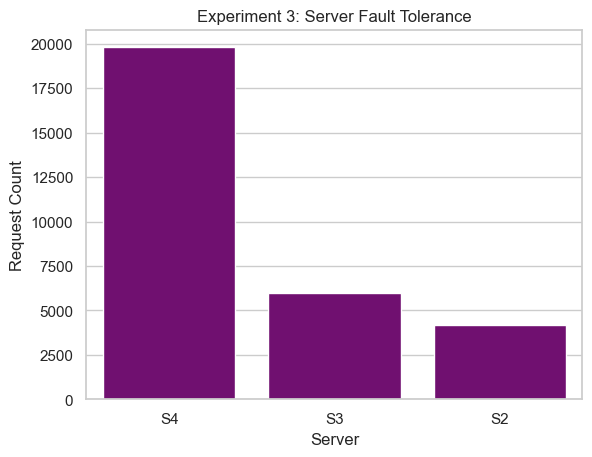

In [8]:
draw_bar_chart(ten_k_requests)

In [19]:
two_servers_request = make_requests(20000)

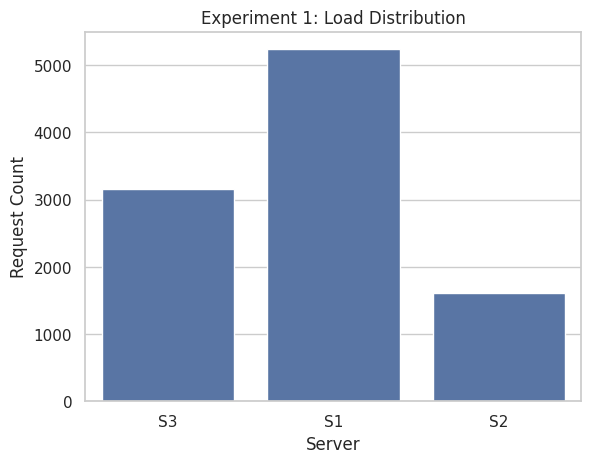

In [28]:
draw_bar_chart(three_servers_request)

In [9]:
def draw_line_chart(two,three,four,five,six):
    """
    Plot a line chart showing the average load of the servers at each run.
    """
    plt.plot(two.keys(), two.values(), label="2 Servers")
    plt.plot(three.keys(), three.values(), label="3 Servers")
    plt.plot(four.keys(), four.values(), label="4 Servers")
    plt.plot(five.keys(), five.values(), label="5 Servers")
    plt.plot(six.keys(), six.values(), label="6 Servers")
    plt.title("Experiment 2: Scalability")
    plt.xlabel("Server")
    plt.ylabel("Request Count")
    plt.legend()
    plt.show()

{'n': 2, 'hostnames': ['S0', 'S1']}
Number of Servers: 2
S0: 2422 requests
Frank: 1859 requests
Ann: 2893 requests
Jude: 1095 requests
Monicah: 487 requests
S1: 1244 requests
----------------------------------------
{'n': 3, 'hostnames': ['S0', 'S1', 'S2']}
Number of Servers: 3
S1: 1350 requests
Jude: 1093 requests
Frank: 938 requests
Monicah: 377 requests
Ann: 5307 requests
emergency_52: 932 requests
----------------------------------------
{'n': 4, 'hostnames': ['S0', 'S1', 'S2', 'S3']}
Number of Servers: 4
Frank: 885 requests
Jude: 668 requests
Ann: 2073 requests
emergency_52: 899 requests
Monicah: 901 requests
S1: 762 requests
S0: 2879 requests
emergency_11: 480 requests
S2: 449 requests
----------------------------------------
{'n': 5, 'hostnames': ['S0', 'S1', 'S2', 'S3', 'S4']}
Number of Servers: 5
S1: 1112 requests
Ann: 3478 requests
emergency_52: 944 requests
Jude: 1121 requests
S0: 242 requests
Monicah: 1248 requests
S2: 452 requests
emergency_11: 439 requests
Frank: 962 requ

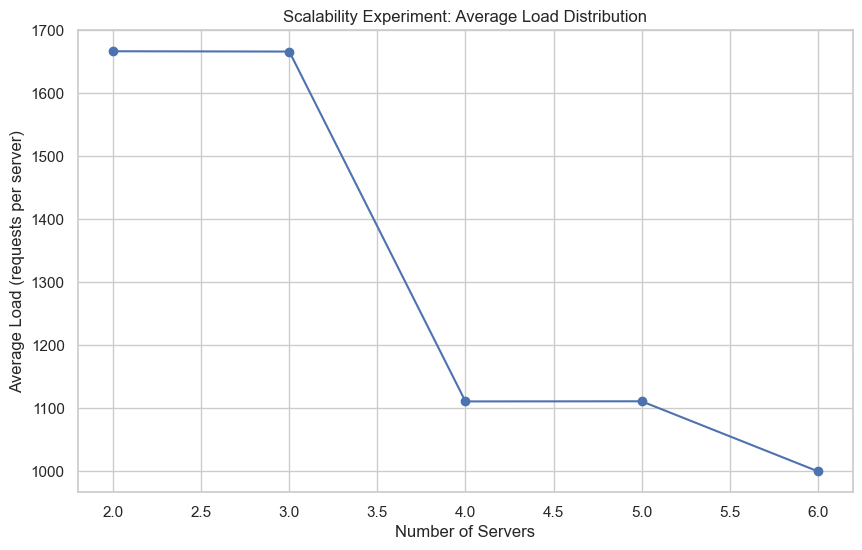

In [11]:
import requests
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to simulate sending requests to the load balancer
def send_requests(load_balancer_url, num_requests=10000):
    server_load = defaultdict(int)
    for _ in range(num_requests):
        response = requests.get(f'{load_balancer_url}/home')
        if response.status_code == 200:
            server = extract_server_name(response.json())
            server_load[server] += 1
    return server_load

# Function to plot the results
def plot_results(results):
    x = list(results.keys())
    y = [sum(loads.values()) / len(loads) for loads in results.values()]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o')
    plt.xlabel('Number of Servers')
    plt.ylabel('Average Load (requests per server)')
    plt.title('Scalability Experiment: Average Load Distribution')
    plt.grid(True)
    plt.show()

# Main experiment loop
def scalability_experiment(load_balancer_url, initial_servers=2, max_servers=6, num_requests=10000):
    results = {}
    
    for num_servers in range(initial_servers, max_servers + 1):
        # Add servers to the load balancer
        hostnames = [f'S{i}' for i in range(num_servers)]
        data = {'n': len(hostnames), 'hostnames': hostnames}
        print(data)
        res = requests.post(f'{load_balancer_url}/add', json=data)
        if res.status_code >=210:
            raise Exception(f"Failed to add servers: {res.text}")
        
        # Send requests and record load
        server_load = send_requests(load_balancer_url, num_requests)
        results[num_servers] = server_load
        
        # Print the load distribution for each run
        print(f'Number of Servers: {num_servers}')
        for server, load in server_load.items():
            print(f'{server}: {load} requests')
        print('-' * 40)

        requests.delete(f'{load_balancer_url}/rm',json=data)
        
    # Plot the results
    plot_results(results)

# URL of the load balancer

# Run the experiment
scalability_experiment("http://localhost:5000")
